### Problem Initial
The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

1.  Add a small initial fraction of black daisies (say, 0.01) to the
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?

2.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.

In [3]:
# functions for problem initial
import context
from numlabs.lab5.lab5_funs import Integrator
import numpy as np
from collections import namedtuple


class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

Black daisie steady state value =  0.007353178051750249


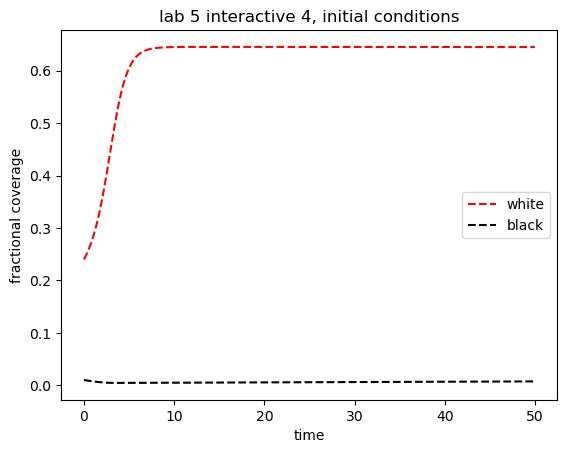

In [4]:
# Solve and plot for problem initial
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial-grace.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('lab 5 interactive 4, initial conditions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')
print('Black daisie steady state value = ', yvals[-1,1])

blackconc = 0,0.01,0.05; whiteconc = 0.24 : non-zero steady state for white daisies, zero steady state for black, no changes to the temperature from the original conditions that goes to steady state at 290.9K (earth temp). These increases in black daisies aren't enough to change the temperature to a point where all the daisies die so the white daisies are still non-zero.

blackconc = 0.1; whiteconc = 0.24 : temperature increases to a steady state at 320.2K (earth temperature), and both the black and white daisies have a zero steady state because it is too hot for them to survive. 

After trying various initial white daisie concentrations (both increasing and decreasing the conc) with an initial black daisie concentration of 0.01, I couldn't find a solution that resulted in both the white and black daisies having an obvious non-zero steady state. However, some of the cases kept an overall non-zero steady state of daisies because the white daisies remained non-zero. And if I print out the actual final value of the black daisie concentration with initial values of whiteconc = 0.24 and blackconc = 0.01, the steady state is at 0.0074, so not exactly zero. Honestly i'm not entirely sure what this question is asking for so I dont know if a fractional coverage of 0.0074 should be considered 'functionally zero' meaning that we'll call it zero but not let it be exactly zero so that black daisies could still potentially grow without it being spontaneous. If the concept of "functionally zero' is not the right way to think about this than I think this would be considered a non-zero steady state.

Equilibrium earth temperature =  290.8836298656207


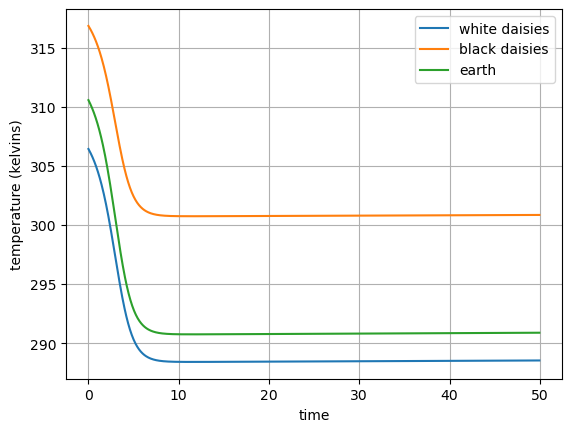

In [5]:
# Solve and plot for problem initial
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial-grace.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])
tempSolve =np.zeros(shape=(len(timevals),3))
for i in range(len(timevals)):
    tempSolve[i,:] = theSolver.find_temp(yvals[i])

fig2, ax2 = plt.subplots(1,1)
line1, = ax2.plot(timevals, tempSolve[:,0], label = 'white daisies')
line2, = ax2.plot(timevals, tempSolve[:,1], label = 'black daisies')
line3, = ax2.plot(timevals, tempSolve[:,2], label = 'earth')
ax2.set_ylabel('temperature (kelvins)')
ax2.set_xlabel('time')
#ax2.set_title('blackconc = 0.04')
ax2.legend()
plt.grid()
print('Equilibrium earth temperature = ', tempSolve[-1,2])

### Problem adaptive
The demos in the previous section solved the Daisyworld equations using the embedded Runge-Kutta methods with adaptive timestep control.

1.  Run the code and find solutions of Daisyworld with the default settings found in adapt.yaml using the timeloop5Err adaptive code

2.  Find the solutions again but this time with fixed stepsizes and compare the size of the timesteps and number of the timesteps.

3.  How much faster does the fixed timeloop need to be to give the same performance as the adaptive timeloop for this case?

<a name="sec_steady"></a>



In [6]:
# your import statements
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import time

time to compute with adaptive steps - time to compute with fixed steps =  -0.0464787483215332


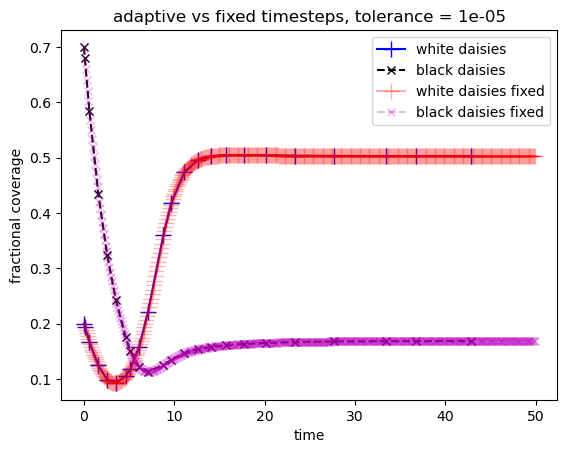

In [7]:
# Solve and plot for adaptive timestep
start_time = time.time()
theSolver = Integ54('adapt.yaml')
timeVals, yVals, errorList = theSolver.timeloop5Err()

with open('adapt.yaml', 'rb') as f:
    config = yaml.safe_load(f)
    adaptvars_in = namedtuple('adaptvars', config['adaptvars'].keys())
    adaptvars = adaptvars_in(**config['adaptvars'])
    
yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])
end_time = time.time()

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--kx', label='black daisies')
theAx.set_title('adaptive vs fixed timesteps, tolerance = ' + str(adaptvars.rtol))
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

start_time2 = time.time()
timeVals,yVals,errorList=theSolver.timeloop5fixed()
yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])
end_time2 = time.time()

points, = theAx.plot(timeVals, yvals['white'], '-r+', label='white daisies fixed',alpha=0.3)
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--mx', label='black daisies fixed',alpha=0.3)
out = theAx.legend(loc='best')

print('time to compute with adaptive steps - time to compute with fixed steps = ', end_time-end_time2)

fixed steps took longer, so in this case the adaptive method was able to find an accurate solution with less steps and less time.

### Problem Predator
To make life a little more interesting on Daisyworld, add a population of rabbits that feed upon the daisies. The
rabbit birth rate will be proportional to the area covered by the daisies while, conversely, the daisy *death rate* will be proportional to the rabbit population.

Add another equation to the Daisyworld model which governs the rabbit population and make the appropriate modifications to the existing daisy equations. Modify the set of equations and solve it with the Runge-Kutta method with adaptive timesteps. Use it to look for steady states and to determine their dependence on the initial conditions and model parameters.

Hand in notebook cells that:

1.  Show your modified Daisyworld equations and your new integrator class.

2.  At least one set of parameter values and initial conditions that leads to the steady state and a plot of the timeseries for the daisies and rabbits.

3.  A discussion of the steady state’s dependence on these values, i.e. what happens when they are altered. Include a few plots for illustration.

4.  Does adding this feedback extend the range of habital L values  for which non-zero populations exist?

**Bonus:**: Now consider foxes that prey on rabbits but
leave the daisies alone.

rate of change of the white daisies population without rabbits,
$$
\frac{dA_w}{dt} = A_w ( \beta_w x - \chi)
$$

rate of change of the black daisies population without rabbits,
$$
\frac{dA_b}{dt} = A_b ( \beta_b x - \chi)
$$

rate of change of the white daisies population with rabbits,
$$
\frac{dA_w}{dt} = A_w ( \beta_w x - \chi) - GrazingRate_w
$$

rate of change of the black daisies population with rabbits,
$$
\frac{dA_b}{dt} = A_b ( \beta_b x - \chi) - GrazingRate_b
$$

where 
$$
GrazingRate_w = A_r * A_w
$$
$$
GrazingRate_b = A_r * A_b
$$

rate of change of the rabbit population,
$$
\frac{dA_r}{dt} = A_r ( RabbitBirthRate x_r - RabbitDeathRate)
$$

where,
$$
RabbitBirthRate = 
$$


In [59]:
# functions for problem initial
import context
from numlabs.lab5.lab5_funs import Integrator
import numpy as np
from collections import namedtuple


class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc, self.initvars.rab_i])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           y[2]=initial rabbits
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        
        #beta is the daisie growth rate
        #chi is the daisie death rate
        #bare is the fractional coverage of the daisies

        rab_i = y[2]
        # rabbits can exist on top of daisies
        barerab = 1.0 - rab_i

        # rabbit birth rate
        rab_br = user.C * (barerab * (y[0] + y[1]))
        
        # rabbit grazing rate 
        wd_graze = user.A * rab_i * y[0]
        bd_graze = user.A * rab_i * y[1]

        # create a 1 x 2 element vector to hold the derivitive
        # the grazing rate is subtracted from the
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi) - wd_graze
        f[1] = y[1] * (beta_b * bare - user.chi) - bd_graze
    
        # add the rabbit population to f
        f[2] = rab_i * (rab_br * barerab - user.rabchi)
        return f

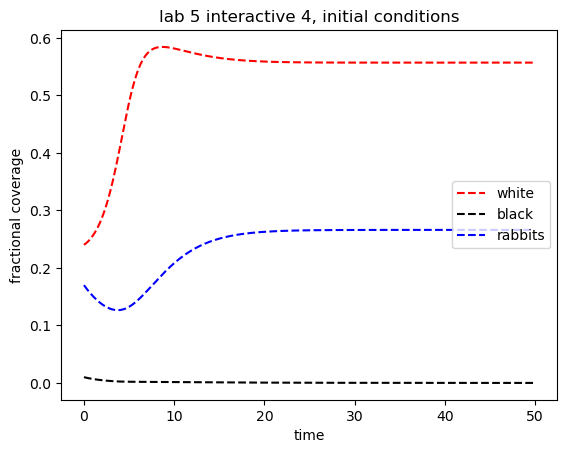

In [64]:
# Solve and plot for problem initial
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial-grace.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black', 'rabbits'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line3, = theAx.plot(timevals, daisies['rabbits'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
line3.set(linestyle='--', color='b', label='rabbits')
theAx.set_title('lab 5 interactive 4, initial conditions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')
